# **Sentix - Análise Inteligente de Sentimentos**

## **Introdução**

Sistema Baseado em Inteligência Artificial para análise de sentimentos em textos. Utilizando processamento de linguagem natural (NLP), o projeto é capaz de interpretar e classificar a polaridade emocional de frases, identificando se um determinado texto expressa um sentimento positivo, negativo ou neutro.

Desenvolvido com Python e integrado a um modelo de machine learning, o Sextix recebe textos de entrada e fornece uma análise automatizada do sentimento embutido, tornando - se uma ferramenta útil para diversas aplicações, como monitoramento de redes sociais, feedback de usuários e suporte automatizado.


 ## 1. **Instalação das Bibliotecas** 

In [1]:
pip install pandas nltk matplotlib seaborn scikit-learn numpy

Note: you may need to restart the kernel to use updated packages.


## 2. **Coleta de Dados** 

* Capturar dados de um arquivo excel (csv) e validar se a coleta deu certo.

In [2]:
# Importando a biblioteca PANDAS para realizar a manipulação dos dados.
import pandas as pd

# Caminho onde a base está localizada.
Base_Tweets = pd.read_csv(r'C:\Users\jmend\OneDrive\Documentos\Projetos\Bases Dados\Tweets.csv', encoding='latin1')

# Verificando as colunas que fora importadas.
Base_Tweets.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [3]:
# Validando os primeiros valores da base.
Base_Tweets.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


## **2.1 Organização do Conjunto de Dados**

* Objetivo de renomear os nomes das colunas, afim de melhorar o entendimento de cada uma delas.


In [4]:
### --> Criando novos nomes para as colunas
columns = ['sentiment', 'tweet_id', 'timestamp', 'query', 'user_name',
           'text']

### --> Atribui os novos nomes de colunas ao conjunto de dados
Base_Tweets.columns = columns

### --> Capturo informações atualizadas dos dados
Base_Tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1599999 non-null  int64 
 1   tweet_id   1599999 non-null  int64 
 2   timestamp  1599999 non-null  object
 3   query      1599999 non-null  object
 4   user_name  1599999 non-null  object
 5   text       1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## 2.2 **Descrição do Conjunto de Dados**

* *Atributos* = 6
    * `sentiment` = Representa o sentimento do tweet.
                    - 0: Negativo
                    - 2: Neutro
                    - 4: Positivo
    * `tweet_id` = ID único do tweet.
    * `timestamp` = Data e hora do tweet.
    * `query` = Consulta usada para coletar o tweet (Geralmente "NO_QUERY").
    * `user_name` = Nome de usuário do autor do tweet.
    * `text` = Conteúdo textual do tweet. Sendo assim o foco principal.

## **2.3 Resumo de Importância das Variáveis**

| Nome da Coluna  | Relevância | Descrição de Importância |
|-----------------|--------------|------------------|
| Sentiment       | Alta (Variável Alvo) | Treinar o mmodelo para classificar sentimento |
| tweet_id | Baixa | Identificação única |
| timestamp | Moderada | Análises temporais ou tendências |
| query | Muito Baixa | Irrelevante |
| username | Baixa | Pouco relevante para analise de sentimentos |
| text | Alta | Texto do tweet usado para o processamento e análise de sentimentos |

## **3. Pré - Processamento**

### **3.1 Seleção de Atributos**

* A seleção de atributos é uma etapa fundamental na preparação de dados para análise e modelagem dos dados. Ao remover essas colunas irrelevantes, conseguimos obter:

    * `Melhorar a performance:`Ao reduzir a dimensionaliade dos dados, os algoritmos de aprendizado de máquina podem treinar mais rapidamente e com maior precisão.

    * `Simplificar a análise:` Ao trabalhar com um conjunto de dados menor e mais focado, a análise se torna mais fácil e intuitiva.

    * `Evitar o overfitting: ` A inclusão de muitas variáveis irrelevantes pode levar o modelo a ter overfitting, ou seja, o modelo se ajusta muito bem ao dados de treinamento e não consegue ter uma generalização eficiente.

In [7]:
# Remove colunas que não serão utilizadas na análise
Base_Tweets = Base_Tweets.drop(columns=['tweet_id', 'query', 'user_name'])

In [8]:
# Verifica as colunas restantes
Base_Tweets.columns

Index(['sentiment', 'timestamp', 'text'], dtype='object')

### **3.2 Limpeza de Texto** 

A etapa aplicada tem como objetivo pré - processar textos, removendo elementos que podem interferir na análise de texto. Ao realizar essa limpeza, os textos se tornam mais padronizados e adequados para técnicas de processamento de linguage natural (NLP), como análise de sentimentos e classificação de texto. 

---

**O que foi feito?**

* ***Remoção de Caracteres indesejados, URLs, menções e hashtags***
    * Esses elemtnos podem desviar a atenção do conteúdo principal do texto. Ao removê - los, garantimos que a análise se concentre nas palavras e frases que realmente expressam a ideia central.

* ***Uniformizar os textos, deixando todos de forma minuscula***
    * Vamos ter uma maior padronização do texto, reduzindo a dimensionalidade do vocabulário e facilita a comparação entre as palavras.

* ***Remover os espaços vazios***
    * Espaços em branco extras podem gerar tokens vazios e comprometer a representação vetorial do texto. Ao remover esses espaços garantimos que cada token represente uma palavra significativa.

In [9]:
# Importação da biblioteca para manipular expressões regulares
import re

#Criei uma função para limpar os textos removendo URLs, menções, hashtags, caracteres especiais.
def clean_text_v3(text):

    # 1. Remove URLs (ex.: http:// ou https://)
    text = re.sub(r"http\S+|www\S+", "", text)

    # 2. Remove menções (ex.: @usuario)
    text = re.sub(r"@\w+", "", text)

    # 3. Remove hashtags (mantendo a palavra associada)
    text = re.sub(r"#", "", text)

    # 4. Remove caracteres especiais, mantendo pontuações relevantes
    text = re.sub(r"[^\w\s.,!?']", "", text)

    # 5. Converte para letras minúsculas
    text = text.lower()

    # 6. Remove espaços extras
    text = re.sub(r"\s+", " ", text).strip()

    return text


In [10]:
# Aplicando função na minha coluna "text"
Base_Tweets['text'] = Base_Tweets['text'].apply(clean_text_v3)

In [11]:
# Validando os valores pra verificar se a limpeza deu certo.
print(Base_Tweets[['text']].head(10))

                                                text
0  is upset that he can't update his facebook by ...
1  i dived many times for the ball. managed to sa...
2     my whole body feels itchy and like its on fire
3  no, it's not behaving at all. i'm mad. why am ...
4                                 not the whole crew
5                                         need a hug
6  hey long time no see! yes.. rains a bit ,only ...
7                           nope they didn't have it
8                                     que me muera ?
9         spring break in plain city... it's snowing


### **3.3 Tokenização**

A tokenização em Processamento em Linguagem Natural, refere - se ao processo de conversão de uma sequência de texto em parte menores que são chamadas de tokens. Certamente, com a aplicação dela podemos ajudar o modelo analisar cada modelo de forma separada e desta forma ficando mais fácil identificar padrões.

---

**O que foi feito?**

* Importação do modelo NLTK que é especialmente utilizado para tarefas de PLN na qual temos que determinar tokens nos textos.

* Criação da coluna tokens, cada texto se torna uma lista.



In [12]:
# Importa a biblioteca NLTK que é a principal para tarefas de processamento de linguagem natural em Python
import nltk

# Dowload do tokenizar Punkt, ele é um modelo que é treinado para dividir textos em sentenças
nltk.download('punkt')

# Criação da coluna tokens, onde nessa coluna cada elementa se torna uma lista.
Base_Tweets['tokens'] = Base_Tweets['text'].apply(nltk.word_tokenize)

print(Base_Tweets[['text', 'tokens']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jmend\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                text  \
0  is upset that he can't update his facebook by ...   
1  i dived many times for the ball. managed to sa...   
2     my whole body feels itchy and like its on fire   
3  no, it's not behaving at all. i'm mad. why am ...   
4                                 not the whole crew   

                                              tokens  
0  [is, upset, that, he, ca, n't, update, his, fa...  
1  [i, dived, many, times, for, the, ball, ., man...  
2  [my, whole, body, feels, itchy, and, like, its...  
3  [no, ,, it, 's, not, behaving, at, all, ., i, ...  
4                            [not, the, whole, crew]  


In [13]:
Base_Tweets.head()


,sentiment,timestamp,text,tokens
0,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his facebook by ...,"[is, upset, that, he, ca, n't, update, his, fa..."
1,0,Mon Apr 06 22:19:53 PDT 2009,i dived many times for the ball. managed to sa...,"[i, dived, many, times, for, the, ball, ., man..."
2,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
3,0,Mon Apr 06 22:19:57 PDT 2009,"no, it's not behaving at all. i'm mad. why am ...","[no, ,, it, 's, not, behaving, at, all, ., i, ..."
4,0,Mon Apr 06 22:20:00 PDT 2009,not the whole crew,"[not, the, whole, crew]"


### **3.4 Remoção de StopWords**

Os StopWords são aquelas palavras que aparecem frequentemente no texto mas que não contribui de forma semãntica. Portanto, com a aplicação desta técnica reduzimos os ruídos presentes nas informações e foca apenas nas palavras mais importantes.

---

**Em Resumo**

* Carregamos uma lista de palavras consideradas comuns e sem significado (stop words) para a língua inglesa.

* Itera sobre cada texto do conjunto de dados.

* Remove as palavras que estão presentes na lista de stop words.

* Atualiza o conjunto de dados com os textos limpos.

In [14]:
# Importa o módulo de stopwords da biblioteca NLTK
from nltk.corpus import stopwords

# Realiza o dowload do conjunto de dados das stopwords, é necessários que estejam disponiveis localmente.
nltk.download('stopwords')

# Criação de um conjunto de dados que contém todas as stopwords da língua inglesa.
stop_words = set(stopwords.words('english'))

# Removemos as palavras que fazem parte dos stopwords baixados na coluna tokens
# Verificamos se a palavra NÃO está presente no conjunto de stopwords
# Se a palavra não estiver, ela é mantida na lista
# Caso contrário, é descartada (removida)
Base_Tweets['tokens'] = Base_Tweets['tokens'].apply(
    lambda tokens: [word for word in tokens if word not in stop_words]
)

# Exibir as primeiras linhas da coluna tokens, para visualizar o efeito do processo de remoção
print(Base_Tweets[['tokens']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jmend\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              tokens
0  [upset, ca, n't, update, facebook, texting, .....
1  [dived, many, times, ball, ., managed, save, 5...
2            [whole, body, feels, itchy, like, fire]
3  [,, 's, behaving, ., 'm, mad, ., ?, ca, n't, s...
4                                      [whole, crew]


### **3.5 Normalização**

A normalização é o processo de transformar o texto em uma forma padronizada. Isso pode facilitar a comparação e a análise de textos e pode ajudar a reduzir a complexidade dos dados. Neste caso, aplicamos técnica de normalização chamada de *Lematização*.

---

**O que é Lematização?**

Técnica que tem o objetivo de reduzir as palavras trazendo elas de volta à sua forma base ou lema original. Desta forma, conseguimos ter melhores resultados em:

* `Simplificar a análise textual;` 

* `Obter melhores informações desses textos;`

* `Tradução e conversão mais automática;`




In [15]:
# Importando a classe responsável pela lematização
from nltk.stem import WordNetLemmatizer

# Realiza o dowload do dicionario denominado como WordNet
nltk.download('wordnet')

# Criação de uma instância do lematizador
lemmatizer = WordNetLemmatizer()

# Aplicamos a lematização na coluna tokens
# Desta forma, cada tokens será aplicado um processo de normalização (lematização)
# Converte a palavra para sua forma base, curta e mais direcionada
Base_Tweets['tokens'] = Base_Tweets['tokens'].apply(
    lambda tokens: [lemmatizer.lemmatize(word) for word in tokens]
)

# Exibir alguns tokens já lematizados
print(Base_Tweets[['tokens']].head())

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jmend\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              tokens
0  [upset, ca, n't, update, facebook, texting, .....
1  [dived, many, time, ball, ., managed, save, 50...
2             [whole, body, feel, itchy, like, fire]
3  [,, 's, behaving, ., 'm, mad, ., ?, ca, n't, s...
4                                      [whole, crew]


### **3.6 Reconstrução de Texto**

* Unir novamente os tokens criados em uma única string.

In [16]:
# Cria uma nova coluna chamada processed_text no nosso conjunto
# Essa coluna irá conter o texto processados e reconstruidos, no qual os tokens serão unidos novamentes em uma unica string

Base_Tweets['processed_text'] = Base_Tweets['tokens'].apply(lambda tokens: " ".join(tokens))

# Exibir o texto processado
print(Base_Tweets[['processed_text']].head())


                                      processed_text
0  upset ca n't update facebook texting ... might...
1  dived many time ball . managed save 50 rest go...
2                    whole body feel itchy like fire
3            , 's behaving . 'm mad . ? ca n't see .
4                                         whole crew


In [17]:
Base_Tweets.head()

,sentiment,timestamp,text,tokens,processed_text
0,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his facebook by ...,"[upset, ca, n't, update, facebook, texting, .....",upset ca n't update facebook texting ... might...
1,0,Mon Apr 06 22:19:53 PDT 2009,i dived many times for the ball. managed to sa...,"[dived, many, time, ball, ., managed, save, 50...",dived many time ball . managed save 50 rest go...
2,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,"[whole, body, feel, itchy, like, fire]",whole body feel itchy like fire
3,0,Mon Apr 06 22:19:57 PDT 2009,"no, it's not behaving at all. i'm mad. why am ...","[,, 's, behaving, ., 'm, mad, ., ?, ca, n't, s...",", 's behaving . 'm mad . ? ca n't see ."
4,0,Mon Apr 06 22:20:00 PDT 2009,not the whole crew,"[whole, crew]",whole crew


## **4. Anáise Explorátoria (EDA)**

### **4.1 Distribuição de Sentimento**

**Introdução**

Esta análise univariada foi fundamental para entender a polaridade das opiniões expressas em um corpus de textos.

---

**Interpretação do Gráfico**

O gráfico de barras mostra a contagem de tweets classificados como negativos (negativos) e positivos (4). Podemos observar que:

* `Equilíbrio entre os Sentimentos:`

    O número de tweets classificados como negativos e positivos é aproximadamente o mesmo. Isso sugere um equilíbrio na polaridade dos sentimentos expressos no conjunto de dados.

* `Ausência de Sentimentos Neutros:`

    O gráfico não apresenta dados para sentimentos neutros, indicando que todos os tweets foram classificados como positivos ou negativos.

---

**Conclusões**

Com base nessa análise, podemos concluir que:

* `Diversidade de Opiniões:` 

    O conjunto de dados apresenta uma diversidade de opiniões, com um número similar de tweets expressando sentimentos positivos e negativos.

* `Classificação Binária:`

    A classificação dos sentimentos foi realizada de forma binária, ou seja, os tweets foram categorizados como exclusivamente positivos ou negativos.

C:\Users\jmend\AppData\Local\Temp\ipykernel_23120\2016438493.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


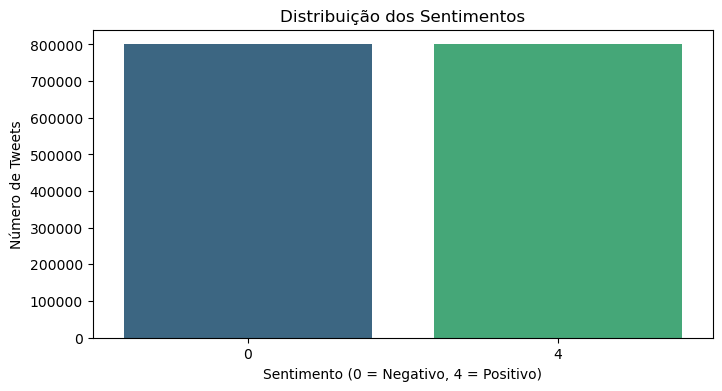

In [18]:
# Importando bibliotecas como 'matplotlib' e 'seaborn' feitas para visualizações gráficas no python
import matplotlib.pyplot as plt
import seaborn as sns

# Realização da contagem de vezes que sentimento = 0 e sentimento = 4 aparecem no dataset
sentiment_counts = Base_Tweets['sentiment'].value_counts()

# Desenvolvimento do gráfico
plt.figure(figsize=(8, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribuição dos Sentimentos")
plt.xlabel("Sentimento (0 = Negativo, 4 = Positivo)")
plt.ylabel("Número de Tweets")
plt.show()

### **4.2 Comprimento de Texto**

**Introdução**

A análise realizada demonstra como está a distribuição do número de caracteres em um conjunto de textos (tweets). Essa análise é fundamental para entendermos o formato dos tweets e como o comprimento dos textos influencia em outras análises.

---

**Interpretação do Gráfico**

* `Assimetria à direita:` 

A distribuição apresenta uma cauda longa à direita, indicando que a maioria dos tweets tem um comprimento menor, mas há alguns tweets muitos longos.

* `Pico central: ` 

A distribuição apresenta um pico central, indicando que existe um comprimento de tweet mais comum.

---

**Conclusões**

* `Otimização do Espaço:`

    A maioria dos usuários parece otimizar o uso dos caracteres, com a maioria dos tweets tendo um comprimento médio.

* `Conteúdo Variado:`

    A presença de tweets mais longos indica que alguns usuários utilizam todo o espaço dispnível para expressar suas ideias.






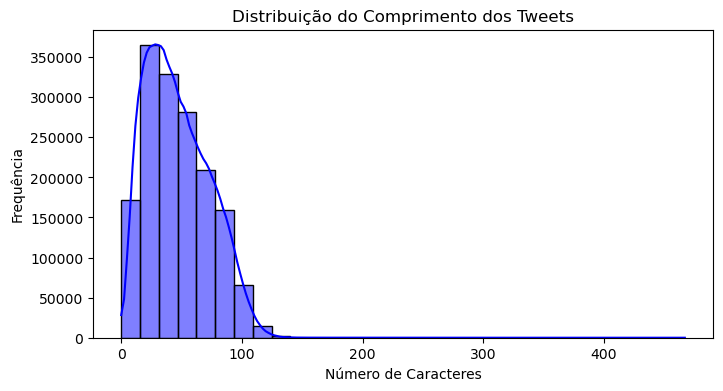

In [19]:
# Criação de uma nova coluna chamada 'text_lenght', na qual nessa coluna demonstra o tamanho que aquele texto possui = quantidade de caracteres
Base_Tweets['text_length'] = Base_Tweets['processed_text'].apply(len)

# Desenvolvimento do gráfico de histograma
plt.figure(figsize=(8, 4))
sns.histplot(Base_Tweets['text_length'], bins=30, kde=True, color='blue')
plt.title("Distribuição do Comprimento dos Tweets")
plt.xlabel("Número de Caracteres")
plt.ylabel("Frequência")
plt.show()

### **4.3 Frequência de Palavras**

**Introdução**

A análise tem o objetivo de demonstrar quais são os 20 caracteres que são mais frequentes no conjunto de textos que estão sendo trabalhados. Desta forma, podemos identificar os termos mais comuns utilizados pelos usuários e obter insights sobre o vocabulário utilizados nas redes sociais.

---

**Interpretação do Gráfico**

* `Predominância de Pontuação:` 

Observa - se que os caracteres de pontuação, como ponto final, vírgula, exclamação, estão entre os mais frequentes. Isso indica que a linguagem utilziada nas redes sociais é bastante expressiva e utiliza diversos recursos para transmitir emoçoes.

* `Contrações:` 

    A utilização frequente de contrações reflete em uma linguagem informal e conversacional característica das redes sociais.

* `Emoções e Sentimentos:` 

    A presença de palavras relacionadas a emoçoes e sentimentos, sugere que pessoas utilizam as redes sociais para expressar suas opiniões e emoções 

--- 

**Conclusões**

* `Linguagem Informal:`

    A predominância de contrações e palavras curtas indica que a linguagem utilizada nas redes sociais é informal e conversacional.
    
* `Expressão de Emoções:`

    A presença de palavras relacionadas a emoçoes sugere que as redes sociais são utilizadas para expressar sentimentos e opiniões.

* `Uso Intenso de Pontuação:`

    A alta frequência de pontuação indica que os usuários utilizam diversos recursos para enfatizar suas mensagens e transmitir emoções.

C:\Users\jmend\AppData\Local\Temp\ipykernel_23120\2661697545.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=common_words_df, palette="viridis")


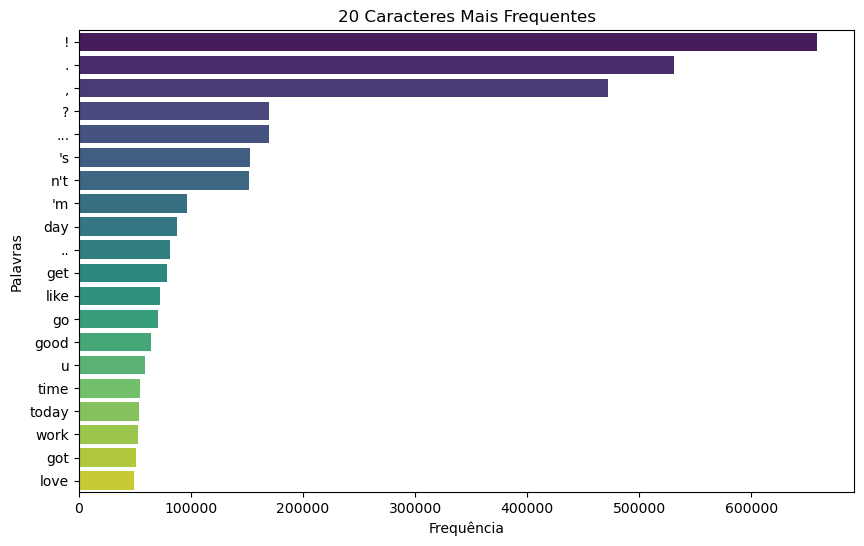

In [20]:
# Importação da biblioteca Counter para contar a frequência de elementos
from collections import Counter

# Utiliza o método .join para reunir os textos processados numa unica string 
all_words = "".join(Base_Tweets['processed_text']).split()

# Conta a frequência de cada palavra na lista dos textos
word_counts = Counter(all_words)

# Identifica as 20 palavras mais comuns e suas respectivas frequências
most_common_words = word_counts.most_common(20)

# Para auxiliar no desenvolvimento da visualização gráfica armazenamos dentro de um DF as palavras mais comuns e mais utilizadas
common_words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Desenvolvimento do gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=common_words_df, palette="viridis")
plt.title("20 Caracteres Mais Frequentes")
plt.xlabel("Frequência")
plt.ylabel("Palavras")
plt.show()

### **4.4 Análise Bivariada (Sentimento vs Comprimento)**

**Introdução**

A ideia é compararar o comprimento dos textos com a polaridade dos sentimentos, e tentar entender se o tamanho dos textos influencia no sentimento gerado.

---

**Interpretação**

* `Mediana`

    A mediana do comprimento dos tweets negativos e positivos é similar, indicando que, em média, os tweets com sentimentos opostos tendem a ter aproximadamente o mesmo comprimento.

* `Outliers`

    A presença de outliers, principalmente em valores mais altos, indica que existem alguns tweets muitos longos, tanto em textos positivos quanto negativos.

---

**Conclusões**

* `Pouca influência do sentimento no comprimento:`

    O comprimento do tweet não parece ser um fator determinante para a polaridade do sentimento expresso.  

* `Outros fatores:`

    A variação no comprimento dos tweets pode estar relacionada a outros fatores, como o tópico discutido, o contexto da conversa ou as características individuais dos usuários.

C:\Users\jmend\AppData\Local\Temp\ipykernel_23120\3383750878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='text_length', data=Base_Tweets, palette="viridis")


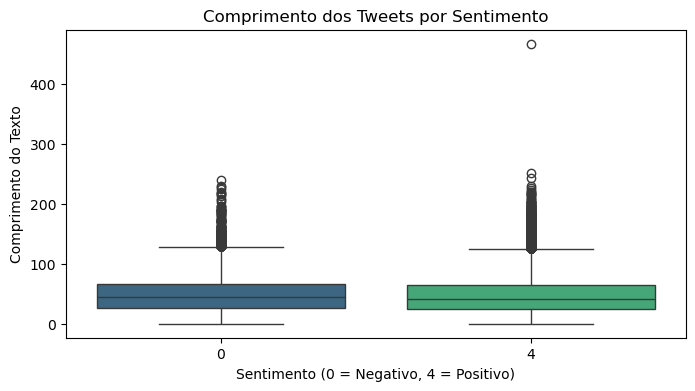

In [23]:
# Desenvolvimento do gráfico box plot para entender como está a correlação da variavel sentimento e comprimento
# Como o comprimento do texto influencia no sentimento transmitido

plt.figure(figsize=(8, 4))
sns.boxplot(x='sentiment', y='text_length', data=Base_Tweets, palette="viridis")
plt.title("Comprimento dos Tweets por Sentimento")
plt.xlabel("Sentimento (0 = Negativo, 4 = Positivo)")
plt.ylabel("Comprimento do Texto")
plt.show()


## **5. Criação do Modelo**

Dois modelos foram criados e testados:

**Modelo Naive Bayes**

O *Naive Bayes* ("Ingenuo de Bayes") é um classificador baseado no Teorema de Bayes. Ele assume que as palavras são independentes entre si, o que torna seu processamento rápido e eficiente. Testamos esta abordagem para a classificação de textos.

**Resultados**

* Acurácia do Modelo: 0.7568 (0.76)

---

**Modelo SVM**

O *SVM* foi utilizado por sua robustez na classificação de texto. Após ajustes e otimização de hiperparâmetros, apresentou resultados superiores:

**Resultados**

* Acurácia do Modelo: 0.7703 (0.78)

---

**Conclusão**

Após os testes e análises, o modelo SVM foi escolhido para a aplicação devido ao seu melhor desempenho na classificação de sentimentos. 

### **5.1 Representação Numérica (TF - IDF)** 

**Introdução**

O objetivo aqui é transformar os textos que estão localizados na variavel `processed_text` em valores numéricos, para que o modelo possa entender melhorar os dados que estão sendo trabalhados.

---

**Definição TF - IDF**

Uma medida estatística que possui o objetivo de avaliar o nível de importância de uma palavra em um determinado tipo de documento. Desta forma, ela leva em conta dois métodos importantes:

* Quantidade de vezes que aparece em um determinado documento.

* O quão rara uma palavra é em todo documento.

---

**Resultados**

Foi gerada uma matriz (vetor) e na qual cada valor que está dentro dela representa o peso TF - IDG de uma determinada palavra. Desta forma, a matriz possui essas características:

* Cada linha representa um tweet, e isso indica que temos 1.599.999 tweets no conjunto de dados.

* Cada coluna representa uma palavra, com isso cada linha terá 5000 valores.





In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(Base_Tweets['processed_text'])

print(f"Forma do vetor TF-IDF: {X.shape}")

Forma do vetor TF-IDF: (1599999, 5000)


### **5.2 Divisão dos Dados**

**Porque dividir os Dados?**

Essa técnica permite avaliar a capacidade de um modelo de generalizar para novos dados, ou seja, de fazer previsões precisas em dados que ele não observou.

---

**Conjunto de Treinamento**

* Utilizado para treinar o modelo. O algoritmo vai estudar os dados de treinamento para identificar padrões entre as features e a variável alvo.

* Ao aprender, o modelo vai ajustar seus parâmetros internos para fazer previsões mais precisas.

---

**Conjunto de Teste**

* Utilizado para avaliar o desempenho do modelo treinado. Após o treinamento, o modelo faz previsões para os dados do conjunto de teste, e essas previsões são comparadas com os valores reais da variável alvo.

* Essa comparação permite medir a acurácia do modelo e identificar se ele está generalizando bem para novos dados.

---

**Resultados**

* `1.279.999 amostras para treinamento:`

Esse é o conjunto de dados que o seu modelo irá utilizar para aprender os padrões e as relações entre as variáveis. É com base nesse conjunto que o modelo será "treinado" a fazer previsões.

* `320.000 amostras para teste:` 

Esse conjunto será utilizado para avaliar a performance do modelo treinado. O modelo fará previsões para essas amostras.

In [25]:
from sklearn.model_selection import train_test_split

y= Base_Tweets['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treino: 1279999 amostras
Tamanho do conjunto de teste: 320000 amostras


### 5.3 Treinamento do Modelo (Naive Bayes)

In [26]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)

print("Modelo Naive Bayes treinado com sucesso")

Modelo Naive Bayes treinado com sucesso


### 5.4 Avaliação do Modelo

In [27]:
from sklearn.metrics import classification_report, accuracy_score

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Acurácia do Modelo:")
print(accuracy_score(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76    159494
           4       0.76      0.75      0.76    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

Acurácia do Modelo:
0.7567875


### **5.5 Desempenho do Modelo Naive Bayes por Classe**

**Introdução**

O gráfico desenvolvido mostra o desempenho de um modelo de classificação Naive Bayes para as duas classes: negativa (0) e positiva (4). Ele compara três métricas de desempenho: Precisão, Recall e F1 - Score.

---

**Interpretação do Gráfico**

O gráfico mostra que o modelo obteve um desempenho bastante similar para ambas as classes, com valores de precisão, recall e F1-score em torno de 0.75. Isso indica que o modelo é capaz de classificar corretamente tanto os exemplos negativos quanto os positivos com uma precisão razoável.

---

**Conclusão**

Com base no gráfico, podemos concluir que o modelo Naive Bayes utilizado apresenta um desempenho razoável na classificação dos dados, com um bom equilíbrio entre precisão e recall para ambas as classes.

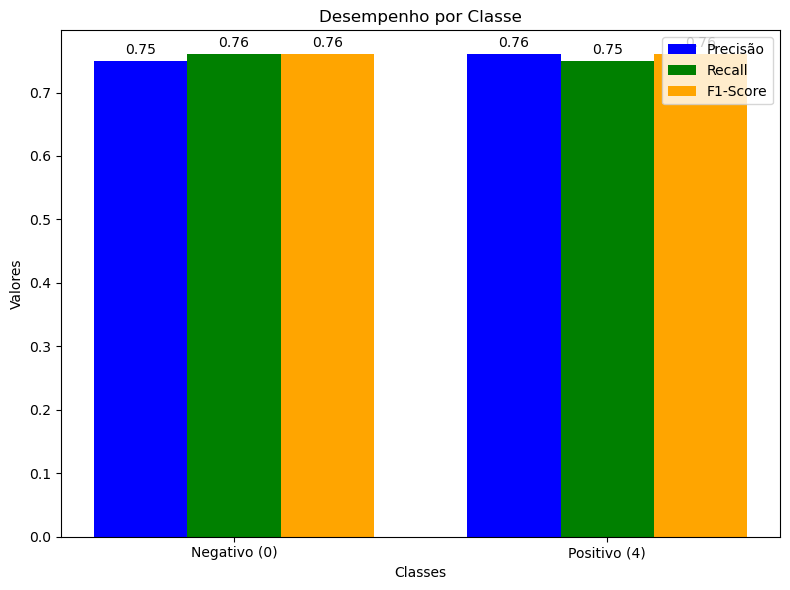

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Métricas extraídas manualmente do relatório
classes = ['Negativo (0)', 'Positivo (4)']
precision = [0.75, 0.76]
recall = [0.76, 0.75]
f1_score = [0.76, 0.76]

# Configurar o gráfico
x = np.arange(len(classes))  # Localização das barras
width = 0.25  # Largura das barras

fig, ax = plt.subplots(figsize=(8, 6))

# Barras para cada métrica
rects1 = ax.bar(x - width, precision, width, label='Precisão', color='blue')
rects2 = ax.bar(x, recall, width, label='Recall', color='green')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='orange')

# Configuração dos rótulos e título
ax.set_xlabel('Classes')
ax.set_ylabel('Valores')
ax.set_title('Desempenho por Classe')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Exibir valores nas barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Distância do texto
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()


## 5.6 **Instanciamento Modelo SVM**

In [29]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

svm_model = LinearSVC()

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_train)

# Fazer previsões no conjunto de teste
y_pred_svm = svm_model.predict(X_test)

# Avaliar o modelo
print("Relatório de Classificação (SVM):")
print(classification_report(y_test, y_pred_svm))

print("Acurácia do Modelo (SVM):")
print(accuracy_score(y_test, y_pred_svm))

c:\Users\jmend\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Relatório de Classificação (SVM):
              precision    recall  f1-score   support

           0       0.79      0.74      0.76    159494
           4       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000

Acurácia do Modelo (SVM):
0.77179375


### **5.7 Comparativo Naive Bayes e SVM**

**Introdução**

Oferece uma comparação visual do desempenho de dois algoritmos de classificação, Naive Bayes e SVM, em um problema de classificação binária as métricas utilizadas para avaliar o desempenho são precisão, recall e F1 - Score.


**Conclusões**

* `Desempenho Semelhante:`

    Ambos os modelos apresentam um desempenho bastante similar, com pequenas diferenças nas métricas.

* `Equilíbrio:`

    Os modelos demonstram um bom equilíbrio entre precisãõ e recall para ambas as classes, indicando que eles são capazes de identificar tanto os exemplos positivos quanto os negativos.

* `SVM levemente superior:`

    O modelo SVM apresenta um desempenho ligeiramente melhor em termos de acurácia e F1 - Score.



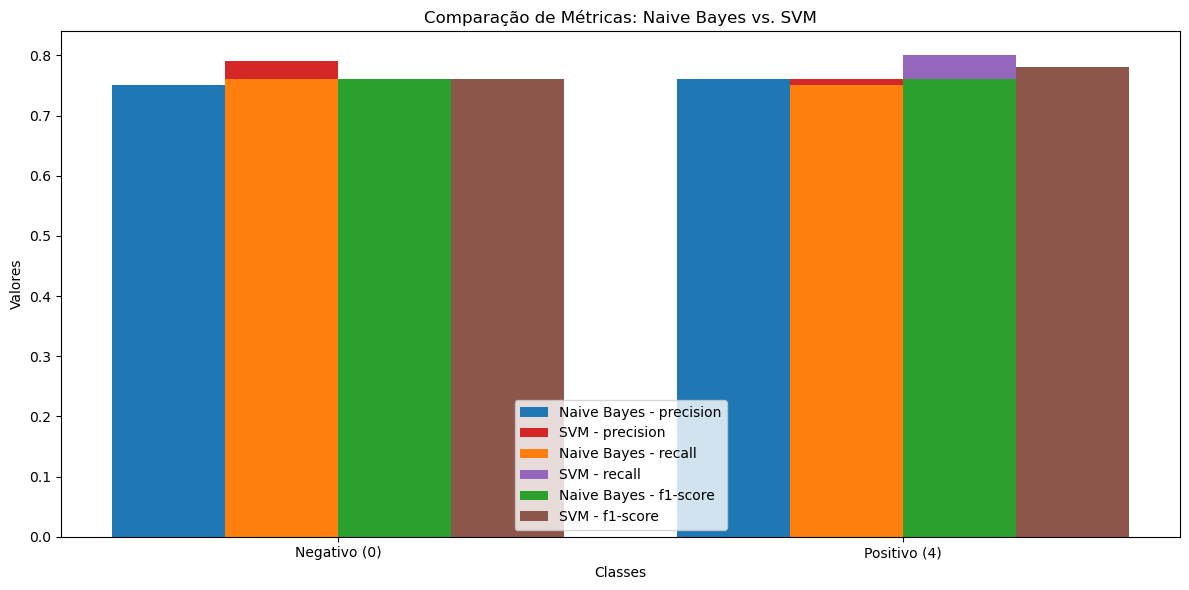

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Métricas do Naive Bayes
nb_metrics = {
    'precision': [0.75, 0.76],
    'recall': [0.76, 0.75],
    'f1-score': [0.76, 0.76]
}

# Métricas do SVM
svm_metrics = {
    'precision': [0.79, 0.76],
    'recall': [0.74, 0.80],
    'f1-score': [0.76, 0.78]
}

# Classes
classes = ['Negativo (0)', 'Positivo (4)']
x = np.arange(len(classes))  # Localização das barras

# Configuração do Gráfico
width = 0.2  # Largura das barras

fig, ax = plt.subplots(figsize=(12, 6))

# Adicionando Barras ao Gráfico
for i, (metric, nb_values) in enumerate(nb_metrics.items()):
    ax.bar(x + (i - 1.5) * width, nb_values, width, label=f'Naive Bayes - {metric}', color=f'C{i}')
    ax.bar(x + (i - 0.5) * width, svm_metrics[metric], width, label=f'SVM - {metric}', color=f'C{i+3}')

# Configurações do Eixo
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_xlabel('Classes')
ax.set_ylabel('Valores')
ax.set_title('Comparação de Métricas: Naive Bayes vs. SVM')
ax.legend()

# Exibir o Gráfico
plt.tight_layout()
plt.show()


## **6. Salvar o Modelo**

In [ ]:
# Importação a biblioteca joblib, que é usada para salvar objetos python na pasta
import joblib

# Salva o modelo SVM treinado no arquivo 'svm_model.pkl'
# 'svm_model': Objeto do modelo treinado 
# 'svm_model.pkl': Nome do arquivo onde o modelo será salvo
joblib.dump(svm_model, 'svm_model.pkl')

# Salva o vetor TD-IDF no arquivo 'tfidf_vectorizer.pkl'
# 'tfidf': Objeto do vetor TF-IDF ajustado
# 'tfidf_vectorizer.pkl': Nome do arquivo onde o vetor ta salvo
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Mensagem de confimação
print("Modelo e vetor TF-IDF salvos com sucesso!")

Modelo e vetor TF-IDF salvos com sucesso!


# 📌 **Conclusão**

O desenvolvimento deste modelo de análise de sentimentos foi um processo detalhado e essencial para compreender como diferentes abordagens podem impactar a classificação de textos. Durante essa etapa, exploramos desde do pré - processamento dos dados até a avaliação dos modelos, garantindo uma pipeline eficiente e bem estruturada.

---

## **Impacto do Pré - Processamento**

O pré - processamento foi uma fase essencial para melhorar a qualidade dos dados e, consequentemente, o desempenho do modelo. As seguintes técnicas foram aplicadas:

* `Remoção de caracteres especiais e pontuação:`

    * Reduziu ruídos no texto, tornando os padrões mais claros para o modelo.

* `Tokenização:`

    * Separou o texto em palavras individuais, permitindo melhor análise de contexto.

* `Remoção de stopwords:`

    * Eliminou palavras comuns que não agregam significado à análise, reduzindo dimensionalidade.

* `Lematização:`
    * Reduziu as palavras à sua forma base, ajudando o modelo a identificar padrões de significado semelhantes.

* `Conversão para minúsculas:`
    * Evitou distinções desnecessárias entre palavras maiúsculas e minúsculas.

Essas técnicas garantiram que o modelo trabalhasse com dados mais *limpos*, *estruturados* e *relevantes*, aumentando sua eficiência na identificação de padrões de sentimento.

---

## **Resultados da Modelagem do Modelo**

🔹O primeiro modelo desenvolvido e testado foi o *Naive Bayes*, que obteve uma acurácia de 75,67%. Embora seja um modelo probabilístico eficiente para textos, observou - se que ele não captava tão bem as relações entre palavras e padrões complexos do conjunto de dados.

🔹 Em seguida, testamos o modelo SVM (Support Vector Machine), que apresentou um desempenho superior, alcançando uma acurácia de 77%. Além disso, apresentou um melhor equilíbrio entre precisão e recall, tornando-se a escolha ideal para esta fase do projeto.

🔹 A análise das métricas indicou que o SVM teve um desempenho mais consistente para ambas as classes, reduzindo erros de classificação e melhorando a separação dos dados de sentimentos positivos e negativos.

---

## **Resumo Final**

O trabalho desenvolvido neste notebook resultou na implementação de uma pipeline completa para um modelo baseado em PLN (Processamento de Linguagem Natural) para análise de sentimentos. Garantindo um modelo eficiente e bem fundamentado.

Com a criação do modelo SVM, ele vai ser conectado juntamente com um sistema em CLI (Interface em Linha de Comando). Desta forma, vai ser possível observar na prática como o modelo interpreta textos que vão ser fornecido pra ele.